<h1>Ajuste polinomial de superficíes com python</h1>

Referência:
-  https://stackoverflow.com/questions/40994059/fit-3d-polynomial-surface-with-python

In [1]:
# bibliotecas

# Para trabalhar os dados
import pandas as pd
import numpy as np

# Para criação do modelo
from sklearn.linear_model import LinearRegression

# Para medir a acurácia
from sklearn.metrics import r2_score

# Para visualização gráfica do modelo
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# dados (Cobb-Douglas dataset)

df = pd.read_csv('https://raw.githubusercontent.com/leandrocl2005/calculo-2/main/data/cobb-douglas.csv')

# P (produção), L (qtdade trabalho em horas), K (capital investido)
df.head(3)

,year,P,L,K
0,1899,100,100,100
1,1900,101,105,107
2,1901,112,110,114


In [3]:
# Estatísticas gerais dos dados

df.describe()

,year,P,L,K
count,24.000000,24.000000,24.000000,24.000000
mean,1910.500000,170.083333,147.208333,230.000000
std,7.071068,49.444670,30.005766,101.883565
min,1899.000000,100.000000,100.000000,100.000000
25%,1904.750000,125.500000,122.750000,146.250000
50%,1910.500000,157.000000,146.500000,212.000000
75%,1916.250000,219.250000,157.250000,289.750000
max,1922.000000,279.000000,201.000000,431.000000


Queremos ajustar uma superfície que descreva $P$ em função de $L$ e $K$. Para um ajuste linear utilizando um plano, ver:

https://github.com/leandrocl2005/calculo-2/blob/main/regressao-linear-multipla.ipynb

Dessa vez faremos um ajuste polinomial.

In [4]:
# Primeiro criaremos novas colunas em df baseada nos valores de L e K

x = df['L'].values
y = df['K'].values

df['x^0*y^0'] = 1
df['x*y'] = x * y
df['x*y^2'] = x * y * y
df['x^2*y^0'] = x * x
df['x^2*y'] = x * x * y

df.head(3)

,year,P,L,K,x^0*y^0,x*y,x*y^2,x^2*y^0,x^2*y
0,1899,100,100,100,1,10000,1000000,10000,1000000
1,1900,101,105,107,1,11235,1202145,11025,1179675
2,1901,112,110,114,1,12540,1429560,12100,1379400


In [5]:
# Criando o modelo

# fit a linear regression model
reg = LinearRegression().fit(df.drop(['year','P'], 1).values, df['P'])

In [6]:
# Criando a coluna de predições
z_pred = reg.intercept_ + np.matmul(df.drop(['year','P'], 1).values, reg.coef_.reshape(-1,1))
df["P_pred"] = z_pred
df[["P", "P_pred"]].tail(4)

,P,P_pred
20,218,229.363487
21,231,228.398489
22,279,263.302824
23,240,257.811715


In [7]:
# Calculando o r2
r2_score(df["P"], df['P_pred'])

0.9681886258550798

Não devemos utilizar todo conjunto para ajustar o modelo e calcular o r2. O correto é reservar parte do conjunto para validação e testes. Como o foco desse tutorial é apenas exibir como é feito um ajuste polinomial, não trataremos essa parte com o rigor devido.

In [8]:
# Criando a grade 2D de pontos (x, y)
x = np.arange(100, 210, 10) # usando o máximo e o mínimo de L
y = np.arange(100, 440, 10) # usando o máximo e o mínimo de K
X,Y = np.meshgrid(x,y)

Z = reg.intercept_
Z += X * reg.coef_[0]
Z += Y * reg.coef_[1]
Z += 1 * reg.coef_[2]
Z += X * Y * reg.coef_[3]
Z += X * Y * Y * reg.coef_[4]
Z += X * X * reg.coef_[5]
Z += X * X * Y * reg.coef_[6]

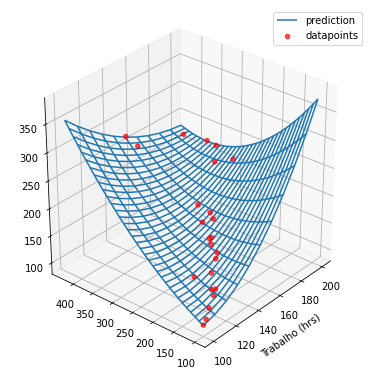

In [18]:
# Visualizando os resultados

fig = plt.figure(figsize = (5,5))
ax = Axes3D(fig)

# plot the fitted curve
ax.plot_wireframe(X, Y, Z, label = 'prediction')

# plot the target values
ax.scatter(df['L'], df['K'], df['P'], c = 'r', label = 'datapoints', alpha = 0.7)
ax.set_xlabel("Trabalho (hrs)")

ax.view_init(30, 220)
plt.legend()
plt.show()